
#**Inventory Data Analysis**

This notebook provides a **detailed Exploratory Data Analysis (EDA)** and **descriptive statistics** of the `inventory.csv` dataset.  
The dataset includes information on materials, quantities, energy consumption, and production performance — all crucial for optimizing manufacturing logistics and sustainability.


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "inventory.csv"  # ensure the CSV file is in the same directory
df = pd.read_csv(file_path)

# Display structure and preview
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  10000 non-null  object 
 1   Machine ID                 10000 non-null  object 
 2   Material Category          10000 non-null  object 
 3   Material Name              10000 non-null  object 
 4   Quantity Used (kg)         10000 non-null  float64
 5   Recycled Material (%)      10000 non-null  float64
 6   Energy Consumption (kWh)   10000 non-null  float64
 7   Production Output (Units)  10000 non-null  int64  
 8   Defect Rate (%)            10000 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 703.3+ KB


,Timestamp,Machine ID,Material Category,Material Name,Quantity Used (kg),Recycled Material (%),Energy Consumption (kWh),Production Output (Units),Defect Rate (%)
0,5/1/2025 8:00,M002,Raw Material,Polypropylene,86.73,0.0,96.74,204,3.38
1,5/1/2025 8:05,M009,Raw Material,Cotton,54.77,0.0,91.24,338,2.53
2,5/1/2025 8:10,M001,Hazardous Material,Lead-Based Alloy,157.40,0.0,164.16,529,1.10
3,5/1/2025 8:15,M010,Process Additive,Industrial Oil,163.82,0.0,99.16,532,1.70
4,5/1/2025 8:20,M003,Intermediate Material,Plastic Resin,65.33,0.0,125.59,467,4.24


##  Descriptive Statistics

In [ ]:

# Descriptive statistics summary
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,10000,10000,6/4/2025 23:55,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Machine ID,10000,10,M007,1041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material Category,10000,6,Raw Material,1758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material Name,10000,17,Solvent,854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity Used (kg),10000.0,NaN,NaN,NaN,124.534008,43.136723,50.01,87.215,124.25,161.7525,200.0
Recycled Material (%),10000.0,NaN,NaN,NaN,4.060385,10.908877,0.0,0.0,0.0,0.0,49.96
Energy Consumption (kWh),10000.0,NaN,NaN,NaN,140.111901,34.540921,80.01,110.6475,140.315,169.8775,200.0
Production Output (Units),10000.0,NaN,NaN,NaN,553.4815,260.877808,100.0,327.0,554.0,780.0,1000.0
Defect Rate (%),10000.0,NaN,NaN,NaN,2.526966,1.442364,0.0,1.29,2.54,3.78,5.0


## Missing Values

In [ ]:

df.isnull().sum().sort_values(ascending=False)


,0
Timestamp,0
Machine ID,0
Material Category,0
Material Name,0
Quantity Used (kg),0
Recycled Material (%),0
Energy Consumption (kWh),0
Production Output (Units),0
Defect Rate (%),0


#Distribution of Numerical Features

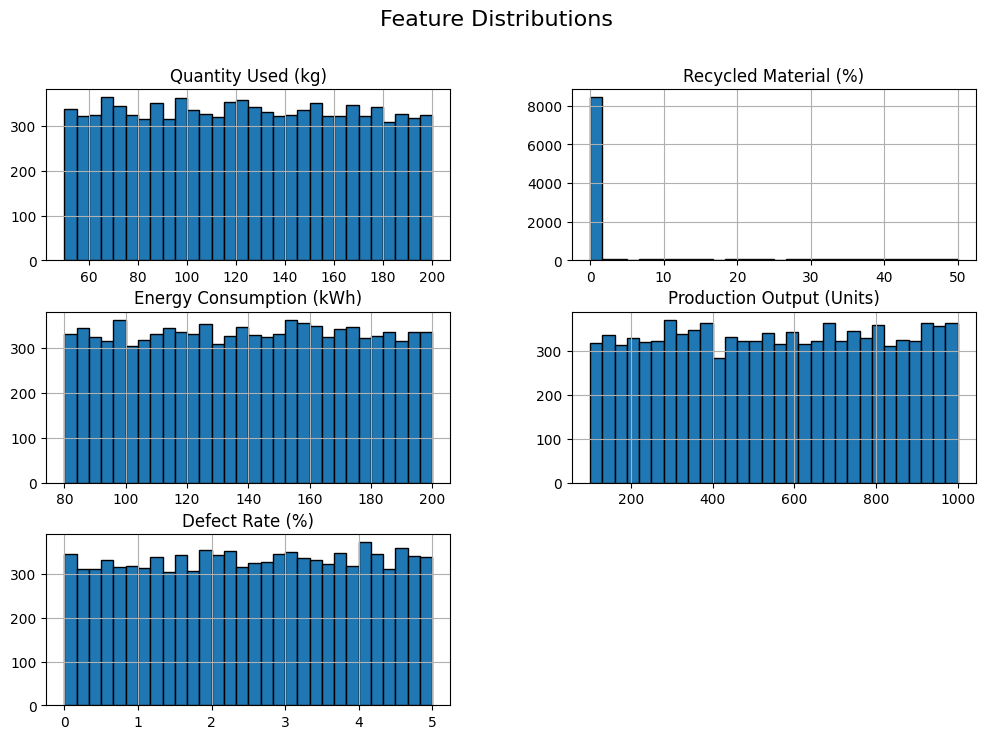

In [ ]:

num_cols = ['Quantity Used (kg)', 'Recycled Material (%)', 'Energy Consumption (kWh)',
             'Production Output (Units)', 'Defect Rate (%)']

df[num_cols].hist(bins=30, figsize=(12,8), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()


## Correlation Heatmap

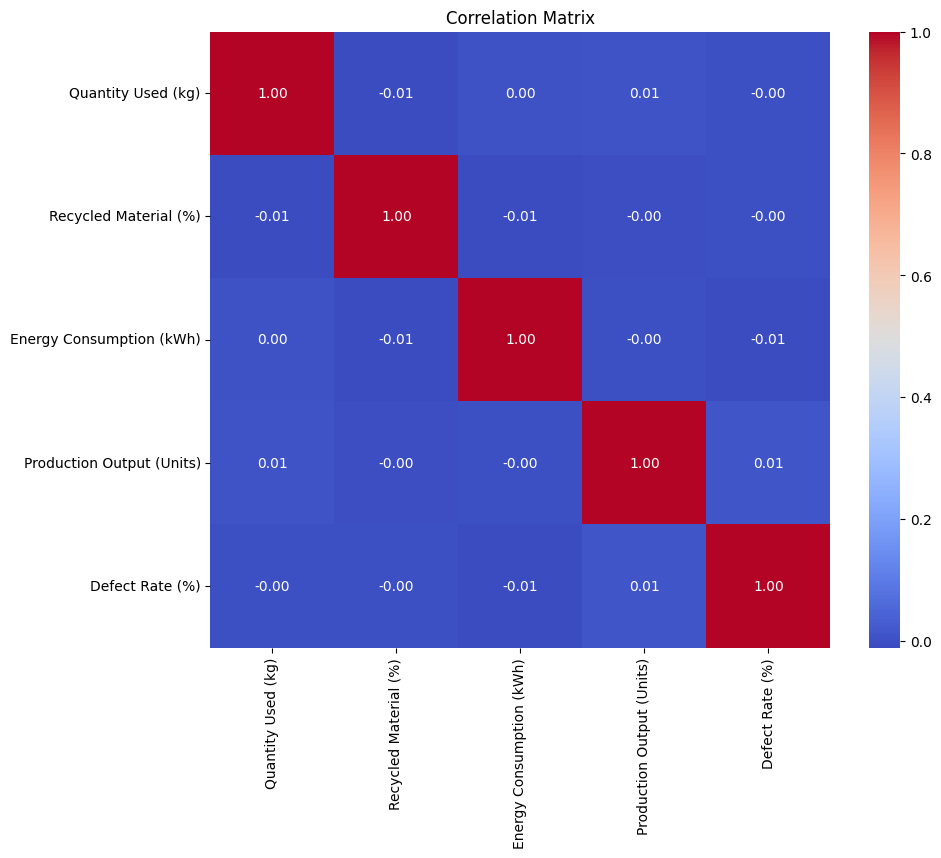

In [ ]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Material Category Analysis

/tmp/ipython-input-3920907709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Material Category', order=df['Material Category'].value_counts().index, palette='viridis')


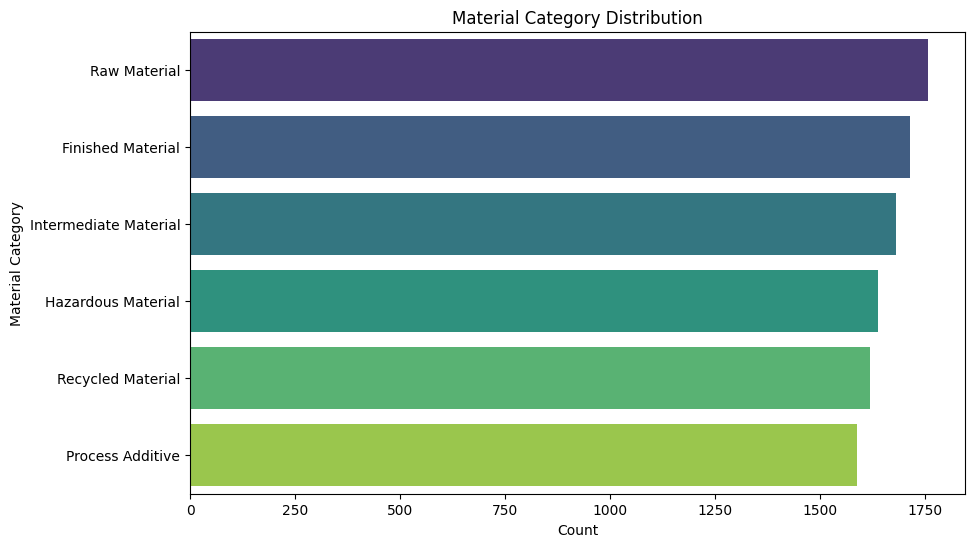

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Material Category', order=df['Material Category'].value_counts().index, palette='viridis')
plt.title('Material Category Distribution')
plt.xlabel('Count')
plt.ylabel('Material Category')
plt.show()


## Energy Consumption vs Production Output

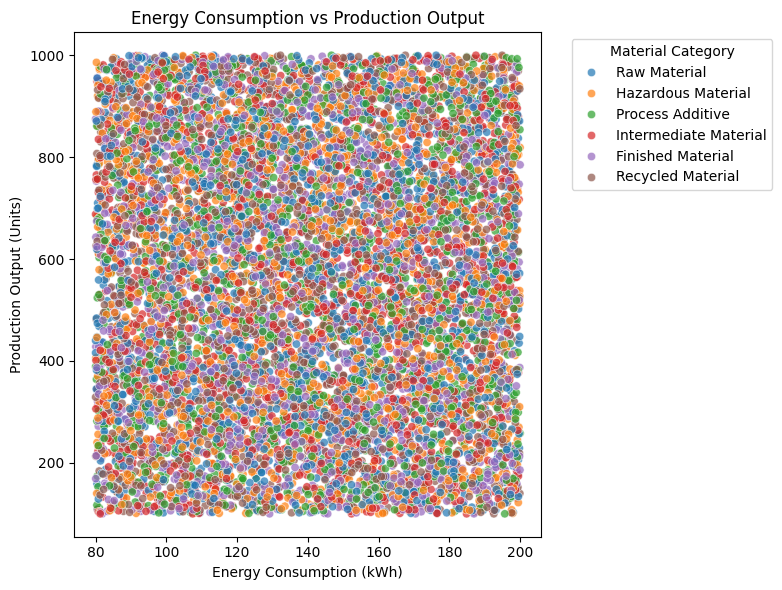

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Energy Consumption (kWh)', y='Production Output (Units)', hue='Material Category', alpha=0.7)
plt.title('Energy Consumption vs Production Output')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Production Output (Units)')
plt.legend(title='Material Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Defect Rate by Material Category

/tmp/ipython-input-1249800792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Material Category', y='Defect Rate (%)', palette='coolwarm')


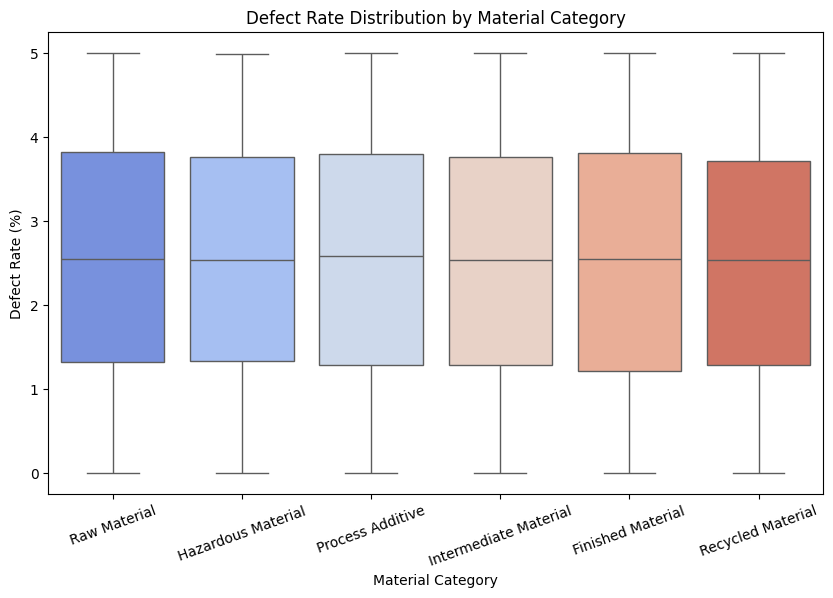

In [ ]:

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Material Category', y='Defect Rate (%)', palette='coolwarm')
plt.title('Defect Rate Distribution by Material Category')
plt.xlabel('Material Category')
plt.ylabel('Defect Rate (%)')
plt.xticks(rotation=20)
plt.show()


## Recycled Material Usage vs Production Output

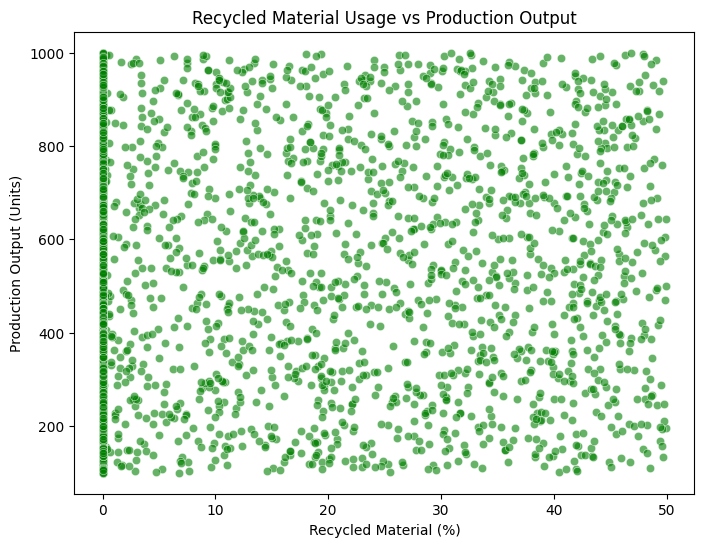

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Recycled Material (%)', y='Production Output (Units)', color='green', alpha=0.6)
plt.title('Recycled Material Usage vs Production Output')
plt.xlabel('Recycled Material (%)')
plt.ylabel('Production Output (Units)')
plt.show()
